# Importing Libraries

In [0]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

# Data Preparation

Unpacking training data. Training data is given in pickle format so we first convert it into numpy array.

In [0]:
with open('train_image.pkl','rb') as file:
    train_image = pickle.load(file)
    train_image = np.array(train_image)
    file.close()

with open('train_label.pkl','rb') as file:
    train_label = pickle.load(file)
    train_label = np.array(train_label)
    file.close()

In [197]:
# Checking dimensions of train images and labels.
train_image.shape, train_label.shape

((8000, 784), (8000,))

In [198]:
classes = np.unique(train_label)

# Images - 28X28 pixels.
IMG_SIZE = 28

# prepareData reshapes X into NxN images with 1 channel and Y is one-hot encoded so that we can use it in neural network.
def prepareData(images, labels):
    Y = []
    X = (np.array(images).reshape(-1,IMG_SIZE,IMG_SIZE,1))/255 # dividing by 255 to fix range of each pixel in between 0 and 1, Normalisation
    for l in labels:
        Y.append([int(classes[i]==l) for i in range(4)])
    
    X = np.array(X)
    Y = np.array(Y)
    
    # this step shuffles the data so that model learns fairly.
    s = np.arange(Y.shape[0])
    np.random.shuffle(s)
    
    return X[s],Y[s]
    
X,Y = prepareData(train_image, train_label)

# printing all the classes
print(classes) 

[0 2 3 6]


In [199]:
# X has 8000 images of dimensions 28 by 28. Y has 8000 labels.
X.shape, Y.shape

((8000, 28, 28, 1), (8000, 4))

# Visualising images from the dataset

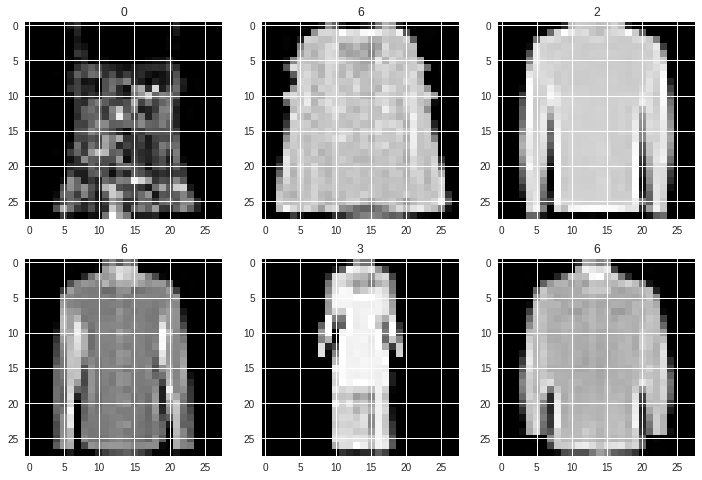

In [200]:
# plotting random images from the dataset with their labels.

fig = plt.figure(figsize=(12, 8))
columns = 3
rows = 2
for i in range(1, columns*rows +1):
    rnd = np.random.randint(0,8000)
    img,lbl = X[rnd].reshape(IMG_SIZE,IMG_SIZE),Y[rnd]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
    plt.title(classes[np.argmax(lbl)])
plt.show()

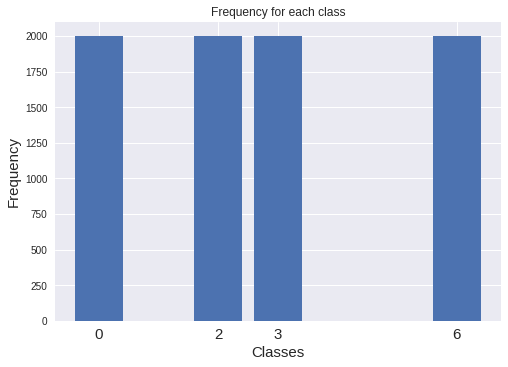

In [201]:
# Plotting no. of occurences of different classes.

counts = [np.sum(train_label==classes[c]) for c in range(len(classes))]
plt.bar(classes, counts)
plt.xlabel('Classes', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(classes, [0,2,3,6], fontsize=15)
plt.title('Frequency for each class')
plt.show()

---
# CNN architectures for classification

We will use Convolutional Neural Network (CNN) for the given classification problem. We will implement CNN using Keras backend by Tensorflow.


In [0]:
# This function will be later used to plot graphs of loss vs epochs and accuracy vs epochs for evaluating and comparing performances of our cnn models.

def plotHistory(history):
    # summarize history for accuracy
    fig = plt.figure(figsize=(10,5))

    fig.add_subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')


    # summarize history for loss
    fig.add_subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')


    plt.show()

# Simple CNN architecture - Model1
Lets try to use a basic CNN architecture with only one convolution-pooling layer followed by a dense layer.

I have used softmax function in last layer and categorical cross entropy as loss function because in our problem there are 4 output classes.

In [203]:
# MODEL ARCHITECTURE

clf1 = keras.models.Sequential()

clf1.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
clf1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

clf1.add(keras.layers.Flatten())

clf1.add(keras.layers.Dense(units=128,activation='relu'))
clf1.add(keras.layers.Dense(units=4,activation='softmax'))


clf1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
clf1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 516       
Total params: 803,780
Trainable params: 803,780
Non-trainable params: 0
_________________________________________________________________


In [204]:
history1 = clf1.fit(X,Y,epochs=50,batch_size=128,validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/50
7200/7200 [==============================] - 2s 224us/sample - loss: 0.6598 - acc: 0.7364 - val_loss: 0.4878 - val_acc: 0.8138
Epoch 2/50
7200/7200 [==============================] - 1s 85us/sample - loss: 0.4502 - acc: 0.8314 - val_loss: 0.4185 - val_acc: 0.8288
Epoch 3/50
7200/7200 [==============================] - 1s 81us/sample - loss: 0.3976 - acc: 0.8501 - val_loss: 0.4048 - val_acc: 0.8350
Epoch 4/50
7200/7200 [==============================] - 1s 83us/sample - loss: 0.3634 - acc: 0.8651 - val_loss: 0.3683 - val_acc: 0.8550
Epoch 5/50
7200/7200 [==============================] - 1s 82us/sample - loss: 0.3362 - acc: 0.8736 - val_loss: 0.4107 - val_acc: 0.8413
Epoch 6/50
7200/7200 [==============================] - 1s 83us/sample - loss: 0.3117 - acc: 0.8815 - val_loss: 0.3607 - val_acc: 0.8525
Epoch 7/50
7200/7200 [==============================] - 1s 82us/sample - loss: 0.2880 - acc: 0.8944 - val_loss: 0.3671 - val_acc: 

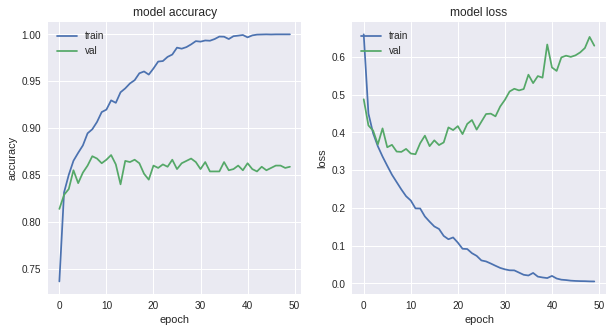

In [205]:
plotHistory(history1)

From above plots, we can clearly see that there is a huge gap between training accuracy and validation accuracy. This hints us that it is case of overfitting. Also, we see that after around 20 epochs our validation loss again starts increasing. 

Let's try to modify this model so that it performs better than this.

# Adding more layers to CNN model - Model2

We try to add more layers of conv-pool layers to increase the complexity of model so that our model will learn more features. Also, we add dropout layers in between some layers to tackle the problem of overfitting.


In [206]:
#model2 with dropouts

clf = keras.models.Sequential()

clf.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
clf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

clf.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
clf.add(keras.layers.Dropout(0.5))


clf.add(keras.layers.Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
clf.add(keras.layers.Dropout(0.5))

clf.add(keras.layers.Flatten())
clf.add(keras.layers.Dense(units=1024,activation='relu'))
clf.add(keras.layers.Dropout(0.5))
clf.add(keras.layers.Dense(units=512,activation='relu'))
clf.add(keras.layers.Dropout(0.5))
clf.add(keras.layers.Dense(units=4,activation='softmax'))


clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
clf.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 256)         0         
__________

In [207]:
# Fitting model2 with 90% of our data as training and 10% as validation data.
history2 = clf.fit(X,Y,epochs=50,batch_size=128,validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/50
7200/7200 [==============================] - 3s 437us/sample - loss: 0.9337 - acc: 0.5785 - val_loss: 0.6924 - val_acc: 0.6875
Epoch 2/50
7200/7200 [==============================] - 2s 243us/sample - loss: 0.6415 - acc: 0.7272 - val_loss: 0.5613 - val_acc: 0.7462
Epoch 3/50
7200/7200 [==============================] - 2s 239us/sample - loss: 0.5399 - acc: 0.7872 - val_loss: 0.4799 - val_acc: 0.7987
Epoch 4/50
7200/7200 [==============================] - 2s 240us/sample - loss: 0.4880 - acc: 0.8131 - val_loss: 0.4371 - val_acc: 0.8125
Epoch 5/50
7200/7200 [==============================] - 2s 238us/sample - loss: 0.4442 - acc: 0.8258 - val_loss: 0.3842 - val_acc: 0.8350
Epoch 6/50
7200/7200 [==============================] - 2s 238us/sample - loss: 0.4299 - acc: 0.8325 - val_loss: 0.3939 - val_acc: 0.8425
Epoch 7/50
7200/7200 [==============================] - 2s 240us/sample - loss: 0.3959 - acc: 0.8443 - val_loss: 0.3367 - val

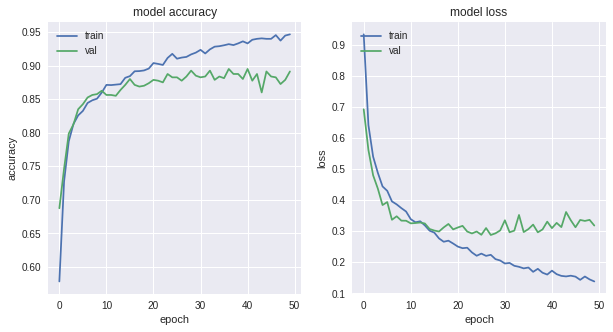

In [208]:
plotHistory(history2)

This model performs much better than our previous model. Also the gap between training accuracy and validation accuracy is reduced a lot.
# Further improving our CNN model  - Model3
I have used CNN in many other datasets like FlowerRecognition, DogsVsCats and from my experience I've found that using Batch Normalisation layer helps a lot in reducing overfitting.
The model defined below is mixed result of some trial and error and internet references and works much better than above two models. 

In [219]:
#model3

clf3 = keras.models.Sequential()

clf3.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE,IMG_SIZE,1)))
clf3.add(keras.layers.BatchNormalization())

clf3.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf3.add(keras.layers.BatchNormalization())
clf3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
clf3.add(keras.layers.Dropout(0.5))


clf3.add(keras.layers.Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf3.add(keras.layers.BatchNormalization())
clf3.add(keras.layers.Dropout(0.5))
    
clf3.add(keras.layers.Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
clf3.add(keras.layers.BatchNormalization())
clf3.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
clf3.add(keras.layers.Dropout(0.5))

clf3.add(keras.layers.Flatten())

clf3.add(keras.layers.Dense(units=512,activation='relu'))
clf3.add(keras.layers.BatchNormalization())
clf3.add(keras.layers.Dropout(0.5))


clf3.add(keras.layers.Dense(units=64,activation='relu'))
clf3.add(keras.layers.BatchNormalization())
clf3.add(keras.layers.Dropout(0.5))

clf3.add(keras.layers.Dense(units=4,activation='softmax'))


clf3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
clf3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_v1_48 (B (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_v1_49 (B (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_52 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 14, 14, 64)        18496     
__________

In [210]:
history3 = clf3.fit(X,Y,epochs=50,batch_size=128,validation_split=0.1)

Train on 7200 samples, validate on 800 samples
Epoch 1/50
7200/7200 [==============================] - 5s 647us/sample - loss: 1.0527 - acc: 0.6149 - val_loss: 1.7114 - val_acc: 0.2612
Epoch 2/50
7200/7200 [==============================] - 3s 355us/sample - loss: 0.7408 - acc: 0.6981 - val_loss: 1.7853 - val_acc: 0.4025
Epoch 3/50
7200/7200 [==============================] - 3s 364us/sample - loss: 0.6437 - acc: 0.7417 - val_loss: 1.7874 - val_acc: 0.4525
Epoch 4/50
7200/7200 [==============================] - 3s 361us/sample - loss: 0.5757 - acc: 0.7775 - val_loss: 2.0018 - val_acc: 0.3938
Epoch 5/50
7200/7200 [==============================] - 3s 363us/sample - loss: 0.5346 - acc: 0.7917 - val_loss: 1.7068 - val_acc: 0.3887
Epoch 6/50
7200/7200 [==============================] - 3s 359us/sample - loss: 0.5054 - acc: 0.8036 - val_loss: 1.4248 - val_acc: 0.4688
Epoch 7/50
7200/7200 [==============================] - 3s 365us/sample - loss: 0.4713 - acc: 0.8204 - val_loss: 1.0525 - val

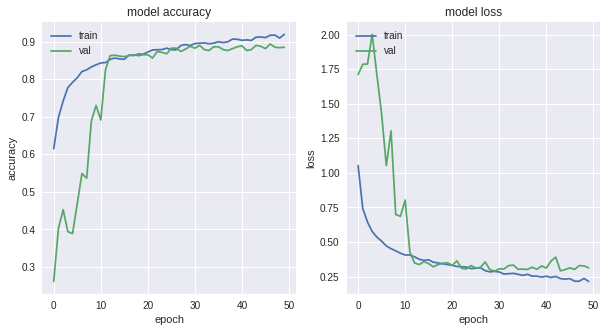

In [211]:
plotHistory(history3)

# Using Data Augmentation techniques to improve our model's learning power

We have 8000 images in our training set. We can increase the number of images in our data set by using data augmentation techniques.
From the above visualisations of image, we can see that dataset contains front image of clothes. 

For each image in our dataset, we can add its mirror image also.

Then, we will train our best model i.e model3 with total of 16000 images.

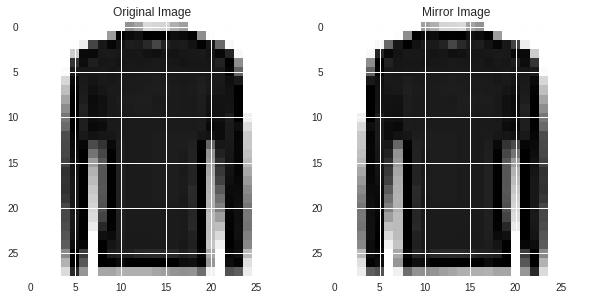

In [212]:

fig = plt.figure(figsize=(10, 10))
columns = 2
rows = 1
rnd = 1004

# Visualising original image and its mirror image.

img = X[rnd].reshape(IMG_SIZE,IMG_SIZE)
fig.add_subplot(rows,columns,1)
plt.imshow(img)
plt.title('Original Image')

transformer = ImageDataGenerator()
mimg = transformer.apply_transform(X[rnd],{'flip_horizontal':True})
fig.add_subplot(rows,columns,2)
plt.imshow(mimg.reshape(IMG_SIZE,IMG_SIZE))
plt.title('Mirror Image')

plt.show()

In [0]:
# this function is used to make final X and Y containg mirror images also.
def final_data(X,Y):
    transformer = ImageDataGenerator()
    
    fX = []
    fY = []
    
    for img in range(len(X)):
        fX.append(X[img])
        fY.append(Y[img])
        mimg = transformer.apply_transform(X[img],{'flip_horizontal':True})
        fX.append(mimg)
        fY.append(Y[img])
       
    fX = np.array(fX)
    fY = np.array(fY)
    
    # this step shuffles the data so that model learns fairly.
    s = np.arange(fY.shape[0])
    np.random.shuffle(s)
    
    return fX[s], fY[s]

trainX,trainY = final_data(X,Y)

Now we have our final data ready. We should see validation score and accuracy for this final data to see if there is any improvement.

In [216]:
# recompile clf3 before running this cell.
historyFinal = clf3.fit(trainX,trainY,epochs=50,batch_size=128,validation_split=0.1)

Train on 14400 samples, validate on 1600 samples
Epoch 1/50
14400/14400 [==============================] - 8s 523us/sample - loss: 0.9688 - acc: 0.6494 - val_loss: 1.8215 - val_acc: 0.2519
Epoch 2/50
14400/14400 [==============================] - 5s 367us/sample - loss: 0.6154 - acc: 0.7583 - val_loss: 1.5495 - val_acc: 0.4031
Epoch 3/50
14400/14400 [==============================] - 5s 369us/sample - loss: 0.5193 - acc: 0.7997 - val_loss: 1.8861 - val_acc: 0.4181
Epoch 4/50
14400/14400 [==============================] - 5s 366us/sample - loss: 0.4698 - acc: 0.8174 - val_loss: 1.5078 - val_acc: 0.6125
Epoch 5/50
14400/14400 [==============================] - 5s 368us/sample - loss: 0.4333 - acc: 0.8280 - val_loss: 0.8155 - val_acc: 0.7425
Epoch 6/50
14400/14400 [==============================] - 5s 368us/sample - loss: 0.4075 - acc: 0.8416 - val_loss: 0.3400 - val_acc: 0.8725
Epoch 7/50
14400/14400 [==============================] - 5s 367us/sample - loss: 0.3871 - acc: 0.8492 - val_lo

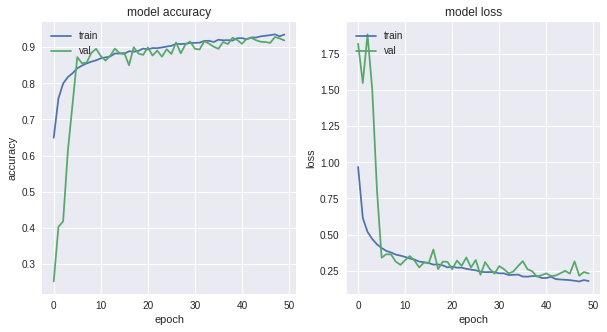

In [217]:
plotHistory(historyFinal)

We can clearly see that training our best model with augmented dataset has improved our model very much.

With this model and augmented data, we have achieved more than* 90% validation accuracy* so now we will train this model with entire dataset with no validation split and then predict results for test dataset.

# Training with entire dataset without validation split.

In [220]:
# recompile clf3 before running this cell.
clf3.fit(trainX,trainY,epochs=100,batch_size=128)

Epoch 1/100
16000/16000 [==============================] - 7s 449us/sample - loss: 0.9152 - acc: 0.6636
Epoch 2/100
16000/16000 [==============================] - 6s 348us/sample - loss: 0.5978 - acc: 0.7665
Epoch 3/100
16000/16000 [==============================] - 6s 349us/sample - loss: 0.4965 - acc: 0.8093
Epoch 4/100
16000/16000 [==============================] - 6s 353us/sample - loss: 0.4583 - acc: 0.8224
Epoch 5/100
16000/16000 [==============================] - 6s 352us/sample - loss: 0.4222 - acc: 0.8349
Epoch 6/100
16000/16000 [==============================] - 6s 348us/sample - loss: 0.4048 - acc: 0.8426
Epoch 7/100
16000/16000 [==============================] - 6s 349us/sample - loss: 0.3872 - acc: 0.8484
Epoch 8/100
16000/16000 [==============================] - 6s 350us/sample - loss: 0.3667 - acc: 0.8581
Epoch 9/100
16000/16000 [==============================] - 6s 349us/sample - loss: 0.3610 - acc: 0.8626
Epoch 10/100
16000/16000 [==============================] - 6s 3

# Predicting test data labels and exporting as CSV

First we need to unpack the test pickle file.

In [0]:
with open('test_image.pkl','rb') as file:
    test_image = pickle.load(file)
    test_image = np.array(test_image)
    file.close()

In [184]:
# there are 2000 test images
test_image.shape

(2000, 784)

In [0]:
# reshaping test images into 28x28 images with 1 channel. dividing by 255 for normalization
test = (test_image.reshape(-1,28,28,1))/255

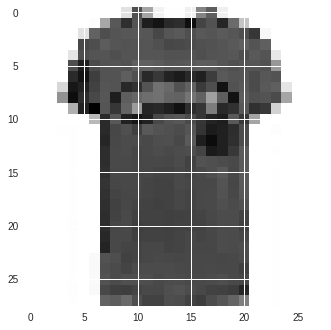

In [194]:
# visualising test image to see if images are properly loaded or not.
plt.imshow(test[0].reshape(28,28))

In [0]:
# predicting test images using clf3 model.

predictions = clf3.predict(test)
predictions = classes[np.argmax(predictions,axis=1)]

In [0]:
# converting into required format

ans = np.array([[i,predictions[i]] for i in range(len(test))])

In [0]:
# saving ans to csv file

ans = pd.DataFrame(ans, columns={'image_index','class'})
ans.to_csv("rishabh_chandra.csv", index=False)